In [1]:
import json
import requests
import pandas as pd

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('playlist_exit_ticket.csv')
df.head()

,playlist,tracks,average_track_popularity,albums,artists,top_genre,average_artist_popularity,average_danceability,top_key,average_tempo,top_time_signature
0,Playlist 1,"['Oops!...I Did It Again', 'All The Small Thin...",65.66,"['Oops!... I Did It Again', 'Enema Of The Stat...","['Britney Spears', 'blink-182', 'Faith Hill', ...",'dancepop',66.17,0.65875,0,122.75544,4
1,Playlist 2,"[""It Wasn't Me"", 'Murder On The Dancefloor', '...",66.79,"['Hot Shot', 'Read My Lips', 'The Marshall Mat...","['Shaggy', 'Sophie Ellis-Bextor', 'Eminem', 'K...",'dancepop',65.65,0.67281,1,115.99193,4
2,Playlist 3,"['Dilemma', 'Without Me', 'Complicated', 'A Th...",64.64,"['Nellyville', 'The Eminem Show', 'Let Go', 'B...","['Nelly', 'Eminem', 'Avril Lavigne', 'Vanessa ...",'dancepop',69.48,0.65076,2,119.75400,4
3,Playlist 4,"['In Da Club', 'Seven Nation Army', 'Lose Your...",66.25,"[""Get Rich Or Die Tryin'"", 'Elephant', 'Curtai...","['50 Cent', 'The White Stripes', 'Eminem', 'Be...",'dancepop',68.93,0.66311,6,116.05242,4
4,Playlist 5,"['Yeah! (feat. Lil Jon & Ludacris)', 'This Lov...",67.68,"['Confessions (Expanded Edition)', 'Songs Abou...","['USHER', 'Maroon 5', 'Rascal Flatts', 'Britne...",'dancepop',69.48,0.66997,1,117.81705,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   playlist                   24 non-null     object 
 1   tracks                     24 non-null     object 
 2   average_track_popularity   24 non-null     float64
 3   albums                     24 non-null     object 
 4   artists                    24 non-null     object 
 5   top_genre                  24 non-null     object 
 6   average_artist_popularity  24 non-null     float64
 7   average_danceability       24 non-null     float64
 8   top_key                    24 non-null     int64  
 9   average_tempo              24 non-null     float64
 10  top_time_signature         24 non-null     int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 2.2+ KB


In [5]:
X = df[['average_track_popularity', 'average_artist_popularity']]

In [6]:
model = DBSCAN(eps=3, min_samples=2).fit(X)

In [7]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,
        1,  1,  1,  2,  2, -1, -1], dtype=int64)

In [8]:
df['labels'] = model.labels_

In [9]:
df.tail()

,playlist,tracks,average_track_popularity,albums,artists,top_genre,average_artist_popularity,average_danceability,top_key,average_tempo,top_time_signature,labels
19,Playlist 20,"['thank u, next', 'bad guy', 'Señorita', '7 ri...",76.10,"['thank u, next', 'WHEN WE ALL FALL ASLEEP, WH...","['Ariana Grande', 'Billie Eilish', 'Shawn Mend...",'pop',81.16,0.71004,1,120.02957,4,1
20,Playlist 21,"['The Box', 'Blinding Lights', 'positions', 'R...",61.48,"['Please Excuse Me for Being Antisocial', 'Bli...","['Roddy Ricch', 'The Weeknd', 'Ariana Grande',...",'pop',81.85,0.70309,6,120.45447,4,2
21,Playlist 22,"['deja vu', 'MONTERO (Call Me By Your Name)', ...",63.13,"['deja vu', 'MONTERO (Call Me By Your Name)', ...","['Olivia Rodrigo', 'Lil Nas X', 'Måneskin', 'S...",'pop',83.65,0.68754,1,119.97148,4,2
22,Playlist 23,"['Me Porto Bonito', 'Anti-Hero', 'As It Was', ...",68.63,"['Un Verano Sin Ti', 'Midnights', 'As It Was',...","['Bad Bunny', 'Taylor Swift', 'Harry Styles', ...",'pop',83.91,0.67006,1,125.11037,4,-1
23,Playlist 24,"['Kill Bill', 'Seven (feat. Latto)', 'Flowers'...",76.77,"['SOS', 'Seven (feat. Latto)', 'Flowers', 'Wha...","['SZA', 'Jung Kook', 'Miley Cyrus', 'Billie Ei...",'pop',84.83,0.67525,5,121.50287,4,-1


In [10]:
silhouette_score(X, model.fit_predict(X))

0.4374976761593561

# K-Means

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import train_test_split
train_df, _ = train_test_split(df, test_size=0.3, random_state=42) 
train_df = train_df[["average_track_popularity", "average_artist_popularity", "average_danceability"]]
train_df.head()

,average_track_popularity,average_artist_popularity,average_danceability
21,63.13,83.65,0.68754
5,68.30,72.62,0.66754
2,64.64,69.48,0.65076
12,72.99,78.68,0.63453
15,76.10,78.89,0.64909


In [29]:
model = KMeans(n_clusters=2)
model.fit(train_df)

KMeans(n_clusters=2)

In [30]:
model.cluster_centers_

array([[67.61714286, 71.01142857,  0.65703571],
       [71.86222222, 81.08777778,  0.67542333]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


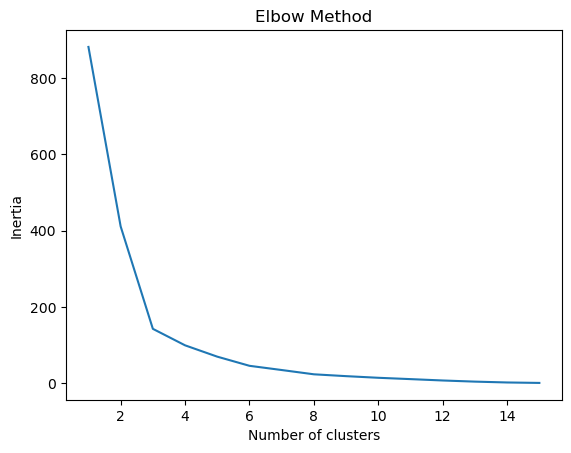

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

elbow = []

# Assuming 'train_df' is your dataset (replace with your actual dataset)
for x in range(1, 16):
    model = KMeans(n_clusters=x)
    model.fit(train_df)  # Fit the model to your dataset
    elbow.append(model.inertia_)  # Append inertia to the list

# Plotting the Elbow graph
plt.plot(range(1, 16), elbow)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [32]:
greatestSil = 0
for x in range(2, 10):
    model = KMeans(n_clusters=x)
    model.fit(train_df)
    
    if silhouette_score(train_df, model.labels_) > greatestSil:
        greatestSil = silhouette_score(train_df, model.labels_)
        bestCluster = x
        

In [33]:
greatestSil

0.6057516932763238

In [34]:
bestCluster

3

In [35]:
model = KMeans(n_clusters=3)
model.fit(train_df)

KMeans(n_clusters=3)

In [28]:
model.cluster_centers_

array([[75.58666667, 80.06333333,  0.66968667],
       [64.41333333, 83.13666667,  0.68689667],
       [67.61714286, 71.01142857,  0.65703571]])